In [2]:
import numpy as np
import os
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [27]:
TRAIN_DATASET_PATH = 'GLIOMA/'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-t2f.nii.gz').get_fdata()
print(test_image_flair.max())
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)


test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-t1n.nii.gz').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-t1c.nii.gz').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-t2w.nii.gz').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)
print(test_image_t2)
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-seg.nii.gz').get_fdata()
test_mask=test_mask.astype(np.uint8)

print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)


2882.869873046875
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0

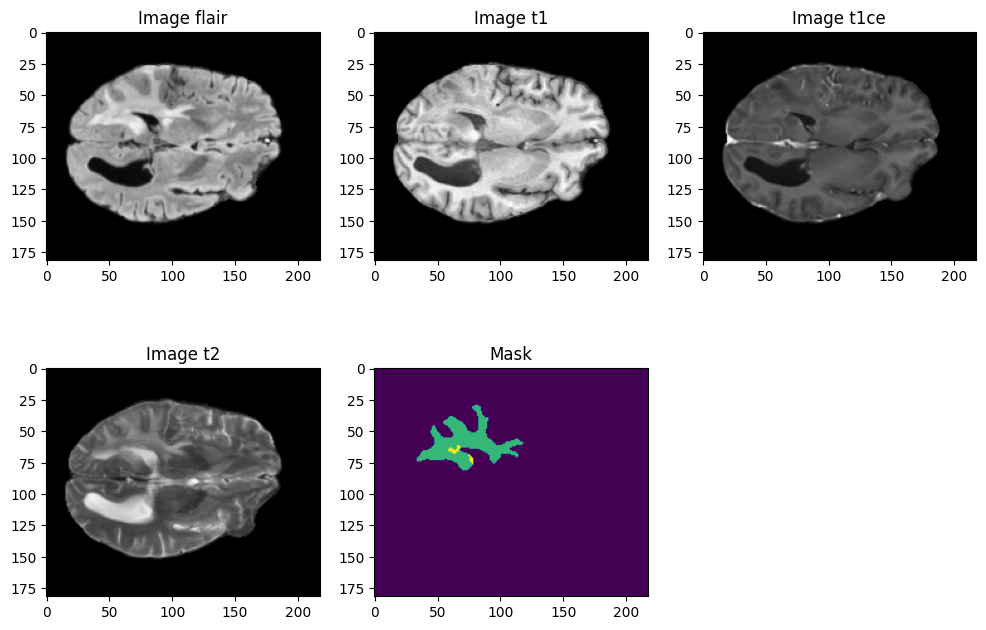

In [29]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [16]:
import numpy as np
from scipy.ndimage import zoom

# Apilar las imágenes en una nueva dimensión
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2, test_image_t1], axis=3)

# Asegúrate de que las dimensiones son correctas antes de redimensionar
print(f"Dimensiones antes de redimensionar: {combined_x.shape}")

# Verifica las dimensiones originales
H, W, D, C = combined_x.shape

# Función para redimensionar imágenes
def resize_image(image, target_shape):
    zoom_factors = [t / s for t, s in zip(target_shape, image.shape)]
    return zoom(image, zoom_factors, order=1)  # Order=1 usa interpolación bilineal

# Determina el redimensionamiento para que las dimensiones sean 128x128x182
target_shape = (128, 128, 182, C)

# Redimensionar la matriz a 128x128x182
combined_x_resized = resize_image(combined_x, target_shape)

# Verifica las dimensiones después de redimensionar
print(f"Dimensiones después de redimensionar: {combined_x_resized.shape}")

# Redimensionar también la máscara
test_mask_resized = resize_image(test_mask, (128, 128, 182))

# Verifica las dimensiones de la máscara después de redimensionar
print(f"Dimensiones de la máscara después de redimensionar: {test_mask_resized.shape}")


Dimensiones antes de redimensionar: (182, 218, 182, 4)
Dimensiones después de redimensionar: (128, 128, 182, 4)
Dimensiones de la máscara después de redimensionar: (128, 128, 182)


In [8]:
# Asegúrate de que las dimensiones son correctas antes de recortar
print(f"Dimensiones antes de recortar: {test_mask.shape}")

# Verifica las dimensiones originales
H, W, D = test_mask.shape

# Determina el recorte para que las dimensiones sean 128x128x182
if H >= 128 and W >= 128 and D == 182:
    # Calcula el inicio y fin del recorte para cada dimensión
    start_h = (H - 128) // 2
    start_w = (W - 128) // 2

    # Recorta la matriz
    test_mask = test_mask[start_h:start_h + 128, start_w:start_w + 128, :]
else:
    raise ValueError("Las dimensiones de entrada no son adecuadas para recortar a 128x128x182")

# Verifica las dimensiones después de recortar
print(f"Dimensiones después de recortar: {test_mask.shape}")


Dimensiones antes de recortar: (182, 218, 182)
Dimensiones después de recortar: (128, 128, 182)


Dimensiones de combined_x: (182, 218, 182, 4)
Dimensiones de test_mask: (182, 218, 182)


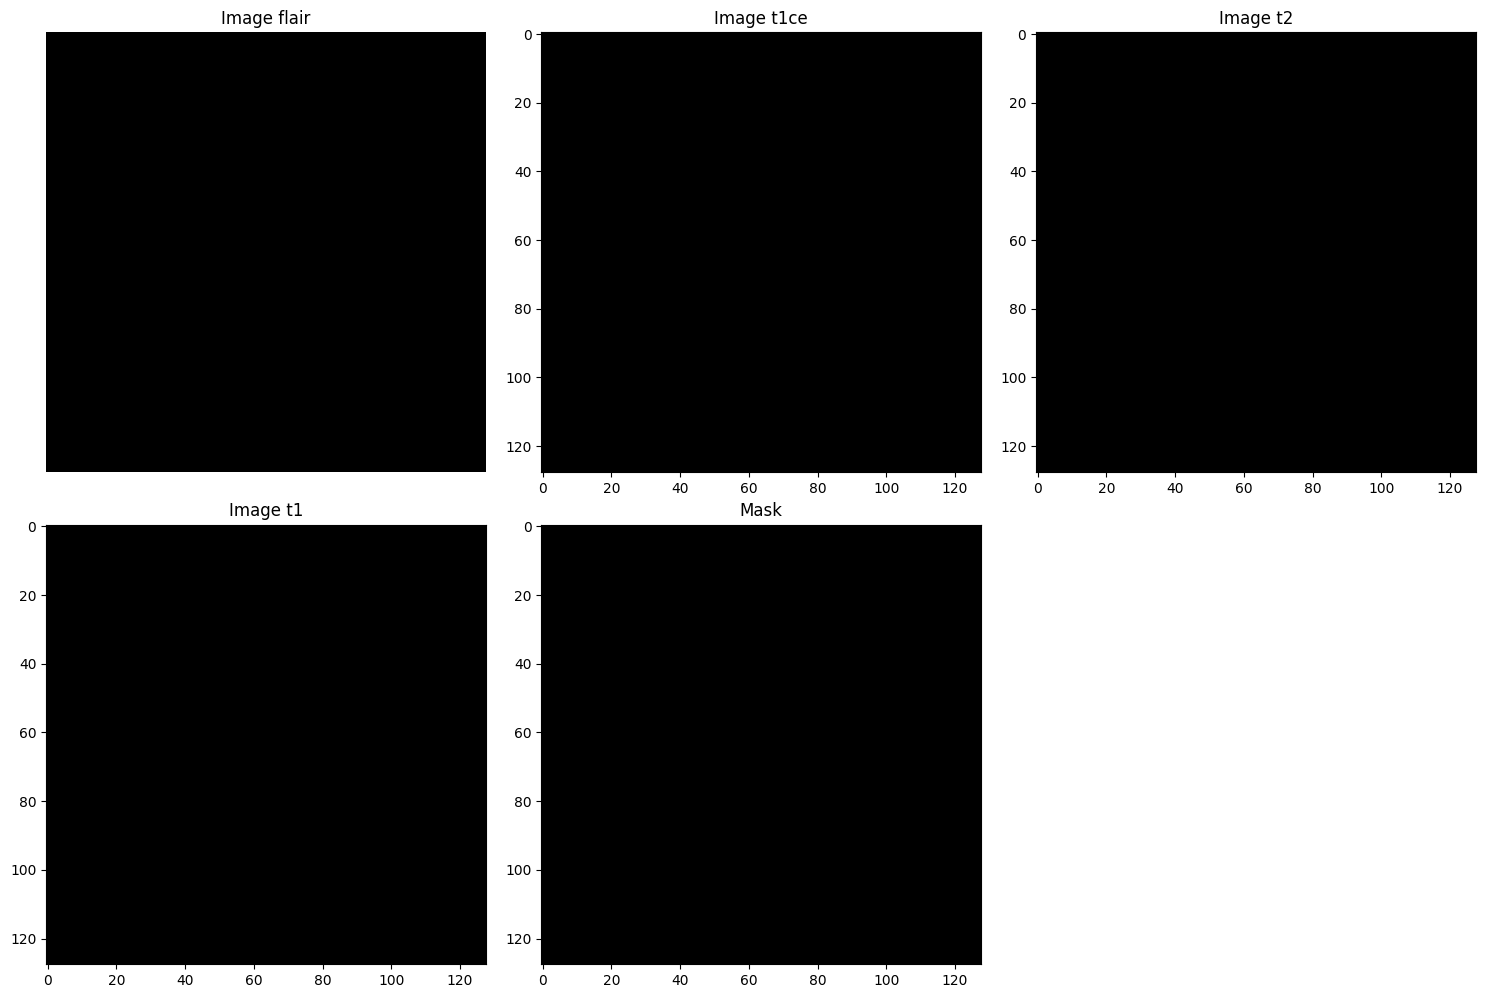

In [32]:
import matplotlib.pyplot as plt


n_slice=181
# Crear una figura con una cuadrícula de 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

  # Ajusta esto según la rebanada que quieras visualizar

# Asegúrate de que `combined_x` y `test_mask` tengan la forma correcta
print(f"Dimensiones de combined_x: {combined_x.shape}")
print(f"Dimensiones de test_mask: {test_mask.shape}")

# Mostrar la imagen flair
axes[0, 0].imshow(combined_x_resized[:, :, n_slice, 0], cmap='gray')
axes[0, 0].set_title('Image flair')
axes[0, 0].axis('off')

# Mostrar la imagen t1ce
axes[0, 1].imshow(combined_x_resized[:, :, n_slice, 1], cmap='gray')
axes[0, 1].set_title('Image t1ce')
axes[0, 1].axis('on')

# Mostrar la imagen t2
axes[0, 2].imshow(combined_x_resized[:, :, n_slice, 2], cmap='gray')
axes[0, 2].set_title('Image t2')
axes[0, 2].axis('on')

# Mostrar la imagen t1 (esto parece ser un error en tu código, ya que es igual a t2, asegúrate de usar la modalidad correcta)
axes[1, 0].imshow(combined_x_resized[:, :, n_slice, 2], cmap='gray')
axes[1, 0].set_title('Image t1')
axes[1, 0].axis('on')

# Mostrar la máscara
axes[1, 1].imshow(test_mask_resized[:, :, n_slice], cmap='gray')
axes[1, 1].set_title('Mask')
axes[1, 1].axis('on')

# Eliminar el subplot adicional
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


In [33]:
TRAIN_DATASET_PATH = 'GLIOMA/'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-t2f.nii.gz').get_fdata()
print(test_image_flair.max())
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)


test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-t1n.nii.gz').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-t1c.nii.gz').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-t2w.nii.gz').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)
print(test_image_t2)
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-03013-100-seg.nii.gz').get_fdata()
test_mask=test_mask.astype(np.uint8)

print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)


2882.869873046875
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0

In [34]:
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)
# Asegúrate de que las dimensiones son correctas antes de recortar
print(f"Dimensiones antes de recortar: {combined_x.shape}")

# Verifica las dimensiones originales
H, W, D, C = combined_x.shape

# Determina el recorte para que todas las dimensiones sean 128
if H >= 128 and W >= 128 and D >= 128:
    # Calcula el inicio y fin del recorte para cada dimensión
    start_h = (H - 128) // 2
    start_w = (W - 128) // 2
    start_d = (D - 128) // 2
    
    combined_x = combined_x[start_h:start_h + 128, start_w:start_w + 128, start_d:start_d + 128]
else:
    raise ValueError("Las dimensiones de entrada son menores a 128, no se puede recortar a 128x128x128")

# Verifica las dimensiones después de recortar
print(f"Dimensiones después de recortar: {combined_x.shape}")

Dimensiones antes de recortar: (182, 218, 182, 3)
Dimensiones después de recortar: (128, 128, 128, 3)


In [35]:
#Do the same for mask
test_mask = test_mask[27:155, 45:173, 27:155]
print(test_mask.shape)  # Debería imprimir (128, 128, 128, 3)

(128, 128, 128)


IndexError: index 128 is out of bounds for axis 2 with size 128

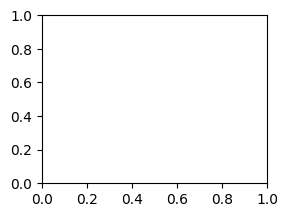

In [40]:
n_slice=128
plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [2]:
t2_list = sorted(glob.glob('BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/*/*t2w.nii.gz'))
t1_list = sorted(glob.glob('BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/*/*t1n.nii.gz'))
t1ce_list = sorted(glob.glob('BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/*/*t1c.nii.gz'))
flair_list = sorted(glob.glob('BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/*/*t2f.nii.gz'))
mask_list = sorted(glob.glob('BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/*/*seg.nii.gz'))

In [6]:
import numpy as np
import nibabel as nib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize

scaler = MinMaxScaler()

target_shape = (160, 160, 160)  # Dimensiones objetivo

for img in range(len(t2_list)):   # Usando t2_list ya que todas las listas tienen el mismo tamaño
    print("Now preparing image and masks number: ", img)
      
    
    temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair = nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask = nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    
    temp_combined_images = np.stack([temp_image_t1ce,temp_image_flair], axis=3)
    
    # Obtener las dimensiones originales
    H, W, D, C = temp_combined_images.shape
    
    # Calcular el rango centrado para cada dimensión
    start_h = (H - target_shape[0]) // 2
    end_h = start_h + target_shape[0]
    
    start_w = (W - target_shape[1]) // 2
    end_w = start_w + target_shape[1]
    
    start_d = (D - target_shape[2]) // 2
    end_d = start_d + target_shape[2]
    
    # Redimensionar a las dimensiones deseadas con centrado en todas las dimensiones
    temp_combined_images_resized = temp_combined_images[start_h:end_h, start_w:end_w, start_d:end_d, :]
    temp_combined_images_resized = resize(temp_combined_images_resized, target_shape, mode='constant', anti_aliasing=True)
    
    temp_mask_resized = temp_mask[start_h:end_h, start_w:end_w, start_d:end_d]
    temp_mask_resized = resize(temp_mask_resized, target_shape, mode='constant', anti_aliasing=False, preserve_range=True).astype(np.uint8)
    
    val, counts = np.unique(temp_mask_resized, return_counts=True)
    
    if (1 - (counts[0] / counts.sum())) > 0.01:  # Al menos el 1% del volumen útil con etiquetas que no son 0
        print("Save Me")
        temp_mask_resized = to_categorical(temp_mask_resized, num_classes=5)
        np.save('C:/Users/lcres/Desktop/modelo/images/image_' + str(img) + '.npy', temp_combined_images_resized)
        np.save('C:/Users/lcres/Desktop/modelo/masks/mask_' + str(img) + '.npy', temp_mask_resized)
    else:
        print("I am useless")


Now preparing image and masks number:  0
I am useless
Now preparing image and masks number:  1
I am useless
Now preparing image and masks number:  2
I am useless
Now preparing image and masks number:  3
I am useless
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
I am useless
Now preparing image and masks number:  6
I am useless
Now preparing image and masks number:  7
I am useless
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image 

Dimensiones de la imagen 0: (128, 128, 160, 2)
Dimensiones de la máscara 0: (128, 128, 160, 5)
Clases en la máscara 0: [0 1 2 3 4]
Conteo de píxeles por clase en la máscara 0: [2522220    1400   83791   13328     701]


IndexError: index 2 is out of bounds for axis 3 with size 2

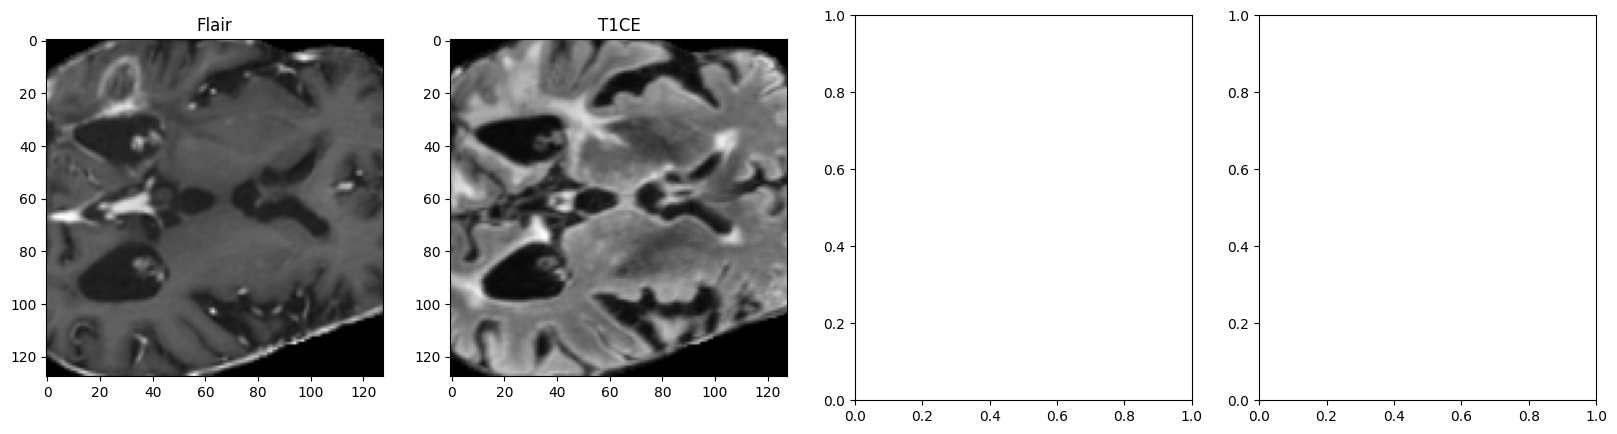

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Directorios de las imágenes y máscaras procesadas
images_dir = 'C:/Users/lcres/Desktop/modelo/images/'
masks_dir = 'C:/Users/lcres/Desktop/modelo/masks/'

# Listar archivos
image_files = sorted(glob.glob(images_dir + '*.npy'))
mask_files = sorted(glob.glob(masks_dir + '*.npy'))

# Comprobar dimensiones y estadísticas
for i in range(3):  # Verificar las primeras 3 imágenes y máscaras
    img = np.load(image_files[i])
    mask = np.load(mask_files[i])

    # Comprobar dimensiones
    print(f"Dimensiones de la imagen {i}: {img.shape}")
    print(f"Dimensiones de la máscara {i}: {mask.shape}")

    # Comprobar estadísticas
    mask_classes, mask_counts = np.unique(np.argmax(mask, axis=-1), return_counts=True)
    print(f"Clases en la máscara {i}: {mask_classes}")
    print(f"Conteo de píxeles por clase en la máscara {i}: {mask_counts}")

    # Visualización
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    
    ax[0].imshow(img[:,:,64, 0], cmap='gray')  # Canal Flair
    ax[0].set_title('Flair')

    ax[1].imshow(img[:,:,64, 1], cmap='gray')  # Canal T1CE
    ax[1].set_title('T1CE')

    ax[2].imshow(img[:,:,64, 2], cmap='gray')  # Canal T2
    ax[2].set_title('T2')

    ax[3].imshow(np.argmax(mask[:, :, 64, :], axis=-1), cmap='jet')  # Máscara
    ax[3].set_title('Máscara')

    plt.show()


funional

In [4]:
import numpy as np
import nibabel as nib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import glob

# Listas de archivos
t1ce_list = sorted(glob.glob('BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/*/*t1c.nii.gz'))
flair_list = sorted(glob.glob('BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/*/*t2f.nii.gz'))
mask_list = sorted(glob.glob('BraTS2024-BraTS-GLI-TrainingData/training_data1_v2/*/*seg.nii.gz'))

scaler = MinMaxScaler()
target_shape = (160, 160, 160)  # Dimensiones objetivo

for img in range(len(t1ce_list)):  # Usando t1ce_list ya que todas las listas tienen el mismo tamaño
    print("Now preparing image and masks number: ", img)
    
    temp_image_t1 = nib.load(t1_list[img]).get_fdata()
    temp_image_t1 = scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)

    temp_image_t2 = nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
    # Cargar y normalizar imágenes
    temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair = nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask = nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    
    temp_combined_images = np.stack([temp_image_t1,temp_image_t1ce, temp_image_t2,temp_image_flair], axis=3)
    
    # Redimensionar a las dimensiones deseadas
    temp_combined_images_resized = resize(temp_combined_images, target_shape, mode='constant', anti_aliasing=True)
    temp_mask_resized = resize(temp_mask, target_shape, mode='constant', anti_aliasing=False, preserve_range=True).astype(np.uint8)
    
    # Verificar y guardar
    val, counts = np.unique(temp_mask_resized, return_counts=True)
    temp_mask_resized = to_categorical(temp_mask_resized, num_classes=5)
    np.save('C:/Users/lcres/Desktop/modelo/images/image_' + str(img) + '.npy', temp_combined_images_resized)
    np.save('C:/Users/lcres/Desktop/modelo/masks/mask_' + str(img) + '.npy', temp_mask_resized)
    print("save")
    


Now preparing image and masks number:  0
save
Now preparing image and masks number:  1
save
Now preparing image and masks number:  2
save
Now preparing image and masks number:  3
save
Now preparing image and masks number:  4
save
Now preparing image and masks number:  5
save
Now preparing image and masks number:  6
save
Now preparing image and masks number:  7
save
Now preparing image and masks number:  8
save
Now preparing image and masks number:  9
save
Now preparing image and masks number:  10
save
Now preparing image and masks number:  11
save
Now preparing image and masks number:  12
save
Now preparing image and masks number:  13
save
Now preparing image and masks number:  14
save
Now preparing image and masks number:  15
save
Now preparing image and masks number:  16
save
Now preparing image and masks number:  17
save
Now preparing image and masks number:  18
save
Now preparing image and masks number:  19
save
Now preparing image and masks number:  20
save
Now preparing image and

KeyboardInterrupt: 

Dimensiones de la imagen 0: (160, 160, 160, 4)
Dimensiones de la máscara 0: (160, 160, 160, 5)
Clases en la máscara 0: [0 1 2 3 4]
Conteo de píxeles por clase en la máscara 0: [4080330    4347    9055     756    1512]


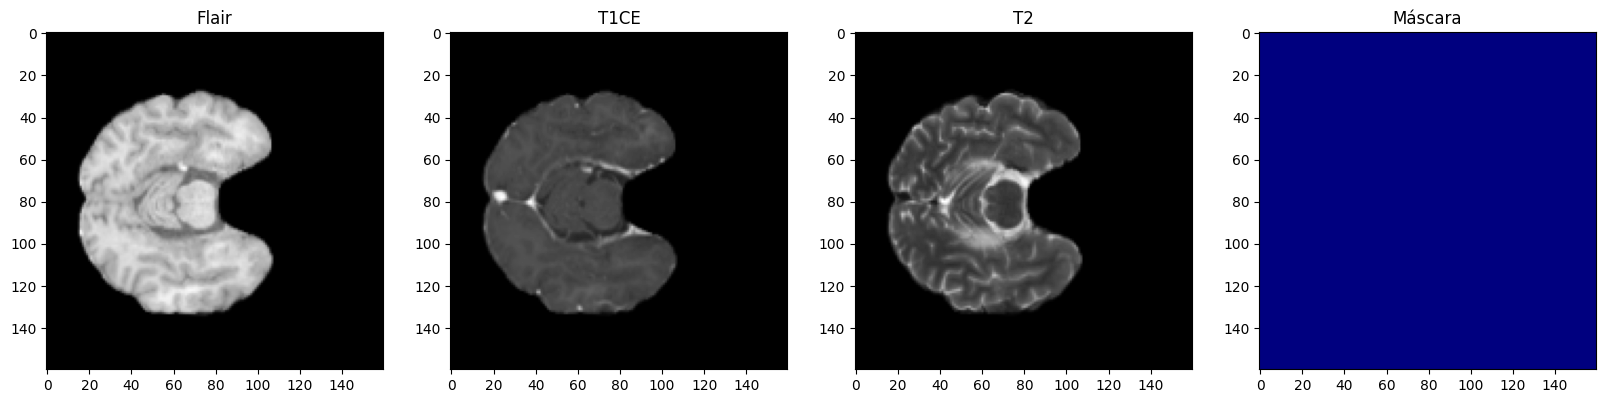

Dimensiones de la imagen 1: (160, 160, 160, 4)
Dimensiones de la máscara 1: (160, 160, 160, 5)
Clases en la máscara 1: [0 1 2 3 4]
Conteo de píxeles por clase en la máscara 1: [4080406    3948    9688     707    1251]


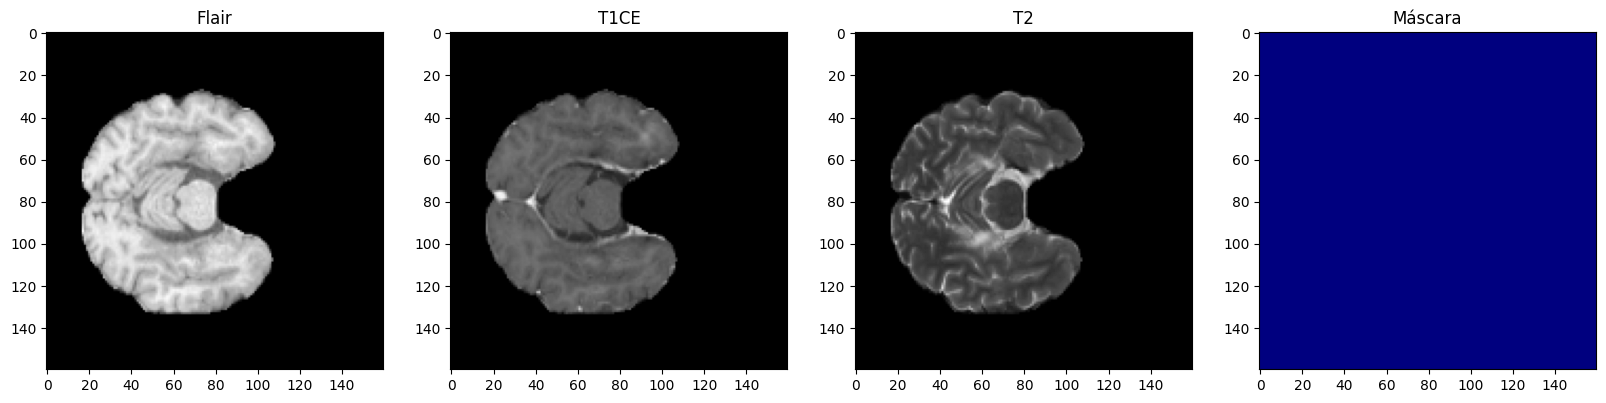

Dimensiones de la imagen 2: (160, 160, 160, 4)
Dimensiones de la máscara 2: (160, 160, 160, 5)
Clases en la máscara 2: [0 1 2 3 4]
Conteo de píxeles por clase en la máscara 2: [4025783   19313   42140    8190     574]


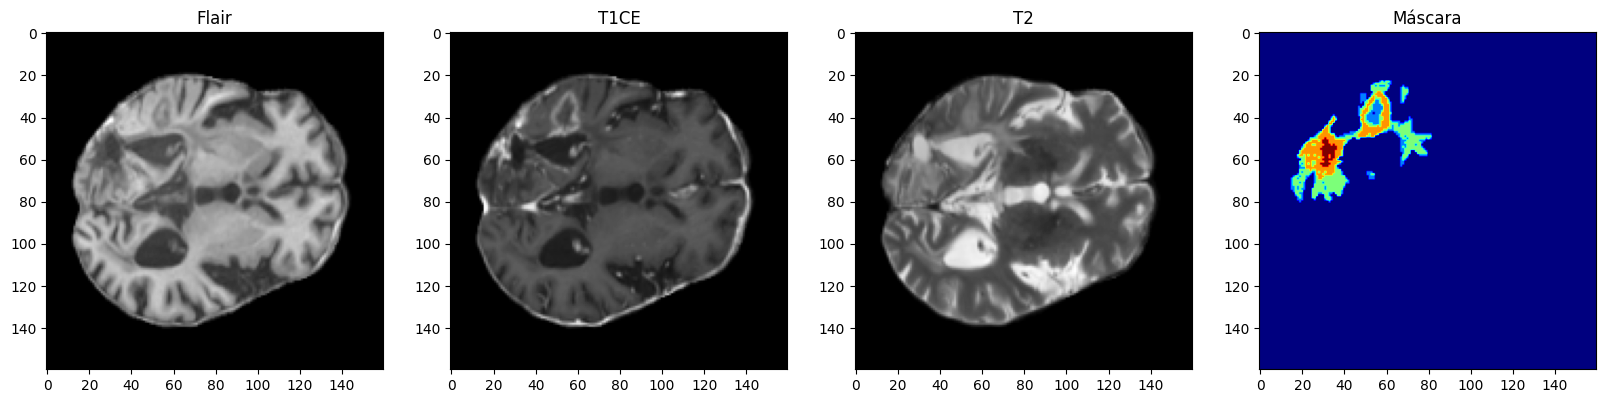

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Directorios de las imágenes y máscaras procesadas
images_dir = 'C:/Users/lcres/Desktop/modelo/images/'
masks_dir = 'C:/Users/lcres/Desktop/modelo/masks/'

# Listar archivos
image_files = sorted(glob.glob(images_dir + '*.npy'))
mask_files = sorted(glob.glob(masks_dir + '*.npy'))

# Comprobar dimensiones y estadísticas
for i in range(3):  # Verificar las primeras 3 imágenes y máscaras
    img = np.load(image_files[i])
    mask = np.load(mask_files[i])

    # Comprobar dimensiones
    print(f"Dimensiones de la imagen {i}: {img.shape}")
    print(f"Dimensiones de la máscara {i}: {mask.shape}")

    # Comprobar estadísticas
    mask_classes, mask_counts = np.unique(np.argmax(mask, axis=-1), return_counts=True)
    print(f"Clases en la máscara {i}: {mask_classes}")
    print(f"Conteo de píxeles por clase en la máscara {i}: {mask_counts}")

    # Visualización
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    
    ax[0].imshow(img[:,:,64, 0], cmap='gray')  # Canal Flair
    ax[0].set_title('Flair')

    ax[1].imshow(img[:,:,64, 1], cmap='gray')  # Canal T1CE
    ax[1].set_title('T1CE')

    ax[2].imshow(img[:,:,64, 2], cmap='gray')  # Canal T2
    ax[2].set_title('T2')

    ax[3].imshow(np.argmax(mask[:, :, 64, :], axis=-1), cmap='jet')  # Máscara
    ax[3].set_title('Máscara')

    plt.show()


In [4]:
import numpy as np
import nibabel as nib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import glob
import os

base_path = r'C:\Users\lcres\PycharmProjects\MPI\BraTS2024-BraTS-GLI-TrainingData\training_data1_v2'
target_shape = (160, 160, 160)  # Dimensiones objetivo
scaler = MinMaxScaler()

# Obtener todas las carpetas en el directorio base
folders = [name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name))]

# Función para obtener el número de paciente de una ruta
def extract_patient_number(folder_name):
    parts = folder_name.split('-')
    if len(parts) >= 2:
        return int(parts[2])
    return None

# Agrupar carpetas por número de paciente
patient_folders = {}
for folder in folders:
    patient_number = extract_patient_number(folder)
    if patient_number is not None:
        if patient_number in patient_folders:
            patient_folders[patient_number].append(folder)
        else:
            patient_folders[patient_number] = [folder]

# Procesar cada paciente
for patient_number, folders in patient_folders.items():
    combined_images = []
    combined_masks = []

    for folder in folders:
        t1ce_path = glob.glob(os.path.join(base_path, folder, '*t1c.nii.gz'))[0]
        t2f_path = glob.glob(os.path.join(base_path, folder, '*t2f.nii.gz'))[0]
        t2w_path = glob.glob(os.path.join(base_path, folder, '*t2w.nii.gz'))[0]
        t1_path = glob.glob(os.path.join(base_path, folder, '*t1n.nii.gz'))[0]
        seg_path = glob.glob(os.path.join(base_path, folder, '*seg.nii.gz'))[0]

        temp_image_t1 = nib.load(t1_path).get_fdata()
        temp_image_t1 = scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)

        temp_image_t2 = nib.load(t2w_path).get_fdata()
        temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
    # Cargar y normalizar imágenes
        temp_image_t1ce = nib.load(t1ce_path).get_fdata()
        temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
        temp_image_flair = nib.load(t2f_path).get_fdata()
        temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
        temp_mask = nib.load(seg_path).get_fdata().astype(np.uint8)

        temp_combined_images = np.stack([temp_image_t1,temp_image_t1ce, temp_image_t2,temp_image_flair], axis=3)
        
        # Añadir a la lista de imágenes y máscaras combinadas
        combined_images.append(temp_combined_images)
        combined_masks.append(temp_mask)

    # Concatenar todas las imágenes y máscaras del paciente
    combined_images = np.concatenate(combined_images, axis=0)
    combined_masks = np.concatenate(combined_masks, axis=0)

    # Redimensionar a las dimensiones deseadas
    combined_images_resized = resize(combined_images, target_shape, mode='constant', anti_aliasing=True)
    combined_masks_resized = resize(combined_masks, target_shape, mode='constant', anti_aliasing=False, preserve_range=True).astype(np.uint8)

    # Codificar las máscaras
    combined_masks_resized = to_categorical(combined_masks_resized, num_classes=5)

    # Guardar los archivos npy
    np.save(f'C:/Users/lcres/Desktop/modelo/images/patient_{patient_number}_images.npy', combined_images_resized)
    np.save(f'C:/Users/lcres/Desktop/modelo/masks/patient_{patient_number}_masks.npy', combined_masks_resized)
    print(f"Saved patient {patient_number} images and masks")



Saved patient 5 images and masks
Saved patient 6 images and masks
Saved patient 8 images and masks
Saved patient 9 images and masks
Saved patient 20 images and masks
Saved patient 27 images and masks
Saved patient 33 images and masks
Saved patient 46 images and masks
Saved patient 60 images and masks
Saved patient 63 images and masks
Saved patient 78 images and masks
Saved patient 80 images and masks
Saved patient 85 images and masks
Saved patient 96 images and masks
Saved patient 463 images and masks
Saved patient 469 images and masks
Saved patient 472 images and masks
Saved patient 483 images and masks
Saved patient 485 images and masks
Saved patient 491 images and masks
Saved patient 498 images and masks
Saved patient 505 images and masks
Saved patient 506 images and masks
Saved patient 507 images and masks
Saved patient 511 images and masks
Saved patient 512 images and masks
Saved patient 517 images and masks
Saved patient 518 images and masks
Saved patient 528 images and masks
Sav

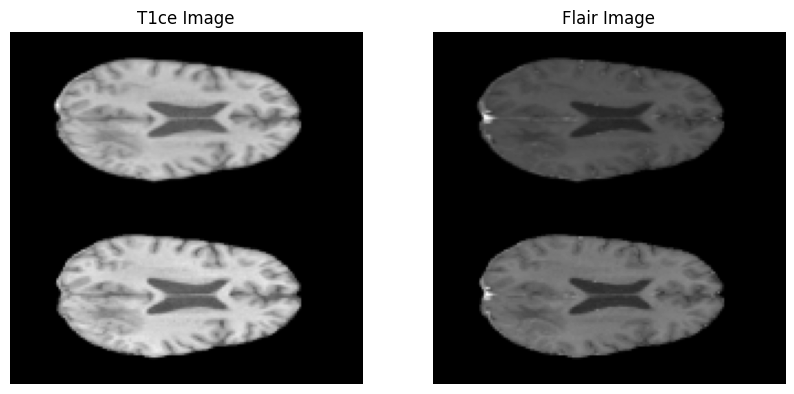

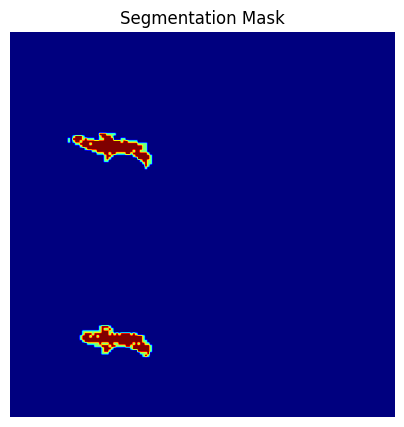

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los archivos .npy
images = np.load('C:/Users/lcres/Desktop/modelo/images/patient_5_images.npy')
masks = np.load('C:/Users/lcres/Desktop/modelo/masks/patient_5_masks.npy')

# Seleccionar una capa (slice) para visualizar
slice_index = 100 # Puedes cambiar este valor para ver diferentes capas

# Mostrar la imagen T1ce y Flair
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(images[:, :, slice_index, 0], cmap='gray')  # T1ce
axes[0].set_title('T1ce Image')
axes[0].axis('off')

axes[1].imshow(images[:, :, slice_index, 1], cmap='gray')  # Flair
axes[1].set_title('Flair Image')
axes[1].axis('off')

plt.show()

# Mostrar la segmentación (máscara)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Asumimos que las máscaras están codificadas en one-hot encoding con 5 clases
# Puedes ajustar los colores según tus necesidades
mask_display = np.argmax(masks[:, :, slice_index, :], axis=-1)

ax.imshow(mask_display, cmap='jet')  # Usar un mapa de colores para las clases
ax.set_title('Segmentation Mask')
ax.axis('off')

plt.show()


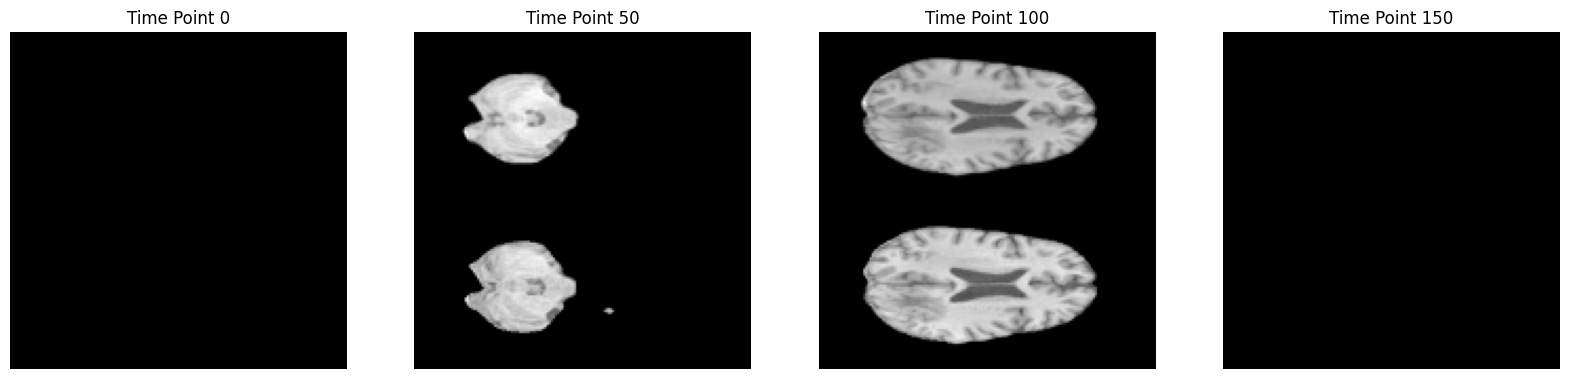

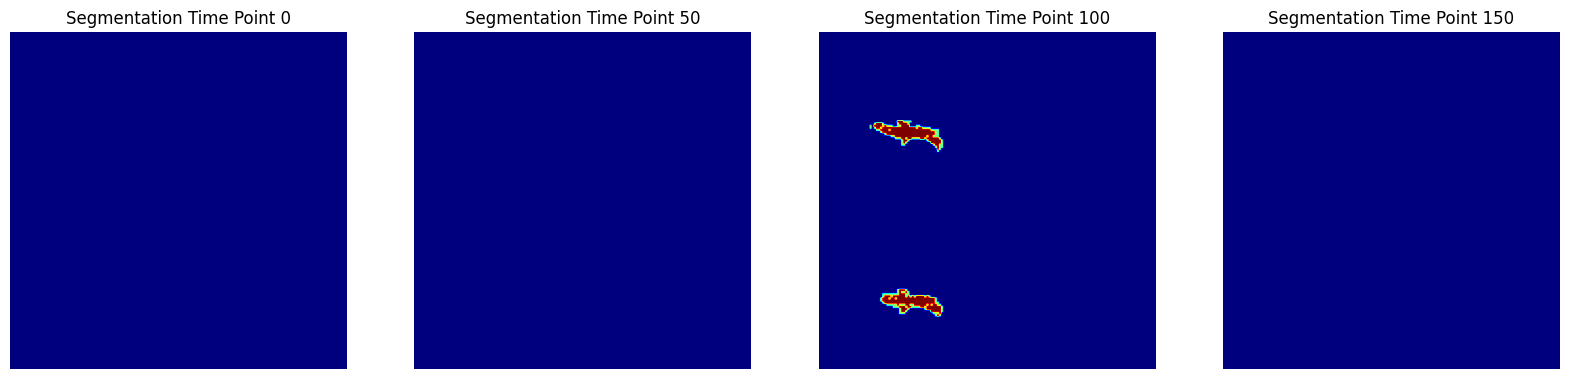

In [12]:
# Supongamos que cada carpeta corresponde a un tiempo diferente
# Seleccionamos diferentes intervalos de slices para visualizar
time_points = [0, 50, 100, 150]  # Índices de capas representando diferentes tiempos

fig, axes = plt.subplots(1, len(time_points), figsize=(20, 5))
for i, t in enumerate(time_points):
    axes[i].imshow(images[:, :, t, 0], cmap='gray')  # Usar T1ce para ilustrar
    axes[i].set_title(f'Time Point {t}')
    axes[i].axis('off')

plt.show()

# Mostrar segmentaciones correspondientes a los tiempos seleccionados
fig, axes = plt.subplots(1, len(time_points), figsize=(20, 5))
for i, t in enumerate(time_points):
    mask_display = np.argmax(masks[:, :, t, :], axis=-1)
    axes[i].imshow(mask_display, cmap='jet')
    axes[i].set_title(f'Segmentation Time Point {t}')
    axes[i].axis('off')

plt.show()


In [13]:
# Directorios de las imágenes y máscaras procesadas
images_dir = 'C:/Users/lcres/Desktop/modelo/images/'
masks_dir = 'C:/Users/lcres/Desktop/modelo/masks/'

# Listar archivos
image_files = sorted(glob.glob(images_dir + '*.npy'))
mask_files = sorted(glob.glob(masks_dir + '*.npy'))

# Comprobar dimensiones y estadísticas
for i in range(3):  # Verificar las primeras 3 imágenes y máscaras
    img = np.load(image_files[i])
    mask = np.load(mask_files[i])

    # Comprobar dimensiones
    print(f"Dimensiones de la imagen {i}: {img.shape}")
    print(f"Dimensiones de la máscara {i}: {mask.shape}")

    # Comprobar estadísticas
    mask_classes, mask_counts = np.unique(np.argmax(mask, axis=-1), return_counts=True)
    print(f"Clases en la máscara {i}: {mask_classes}")
    print(f"Conteo de píxeles por clase en la máscara {i}: {mask_counts}")

Dimensiones de la imagen 0: (160, 160, 160, 4)
Dimensiones de la máscara 0: (160, 160, 160, 5)
Clases en la máscara 0: [0 1 2 3 4]
Conteo de píxeles por clase en la máscara 0: [4036167   11795   31637    6751    9650]
Dimensiones de la imagen 1: (160, 160, 160, 4)
Dimensiones de la máscara 1: (160, 160, 160, 5)
Clases en la máscara 1: [0 1 2 3 4]
Conteo de píxeles por clase en la máscara 1: [4054200    9399   24870    4283    3248]
Dimensiones de la imagen 2: (160, 160, 160, 4)
Dimensiones de la máscara 2: (160, 160, 160, 5)
Clases en la máscara 2: [0 1 2 3 4]
Conteo de píxeles por clase en la máscara 2: [4072435    6517   14684    1382     982]


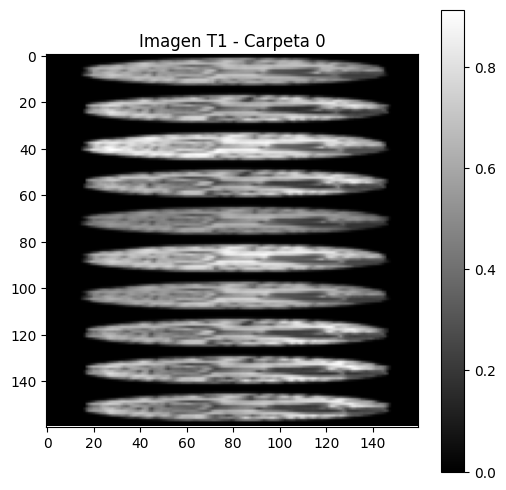

IndexError: index 0 is out of bounds for axis 3 with size 0

<Figure size 600x600 with 0 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npy de imágenes
imagenes_npy_path = 'C:/Users/lcres/Desktop/modelo/images/patient_2093_images.npy'
imagenes_data = np.load(imagenes_npy_path)

# Supongamos que quieres visualizar las primeras dos carpetas de un paciente
for i in range(3):  # Ejemplo: visualizar las primeras dos carpetas
    imagen = imagenes_data[..., i*4:(i+1)*4]  # Obtener la imagen original de la carpeta i

    # Visualizar un corte específico (por ejemplo, z=80)
    plt.figure(figsize=(6, 6))
    plt.imshow(imagen[:, :, 80, 0], cmap='gray')  # Mostrar la primera imagen T1 en el corte z=80
    plt.title(f'Imagen T1 - Carpeta {i}')
    plt.colorbar()
    plt.show()


In [2]:
import numpy as np
import nibabel as nib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import glob
import os

base_path = r'C:\Users\lcres\PycharmProjects\MPI\BraTS2024-BraTS-GLI-TrainingData\training_data1_v2'
target_shape = (160, 160, 160)  # Dimensiones objetivo
scaler = MinMaxScaler()

# Obtener todas las carpetas en el directorio base
folders = [name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name))]

# Función para obtener el número de paciente de una ruta
def extract_patient_number(folder_name):
    parts = folder_name.split('-')
    if len(parts) >= 2:
        return int(parts[2])
    return None

# Agrupar carpetas por número de paciente
patient_folders = {}
for folder in folders:
    patient_number = extract_patient_number(folder)
    if patient_number is not None:
        if patient_number in patient_folders:
            patient_folders[patient_number].append(folder)
        else:
            patient_folders[patient_number] = [folder]
file_counter = 1
# Procesar cada carpeta por separado
for patient_number, folders in patient_folders.items():
    
    for idx, folder in enumerate(folders):
        
        t1ce_path = glob.glob(os.path.join(base_path, folder, '*t1c.nii.gz'))[0]
        t2f_path = glob.glob(os.path.join(base_path, folder, '*t2f.nii.gz'))[0]
        t2w_path = glob.glob(os.path.join(base_path, folder, '*t2w.nii.gz'))[0]
        t1_path = glob.glob(os.path.join(base_path, folder, '*t1n.nii.gz'))[0]
        seg_path = glob.glob(os.path.join(base_path, folder, '*seg.nii.gz'))[0]

        temp_image_t1 = nib.load(t1_path).get_fdata()
        temp_image_t1 = scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)

        temp_image_t2 = nib.load(t2w_path).get_fdata()
        temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

        temp_image_t1ce = nib.load(t1ce_path).get_fdata()
        temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)

        temp_image_flair = nib.load(t2f_path).get_fdata()
        temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

        temp_mask = nib.load(seg_path).get_fdata().astype(np.uint8)

        temp_combined_images = np.stack([temp_image_t1, temp_image_t1ce, temp_image_t2, temp_image_flair], axis=3)
        
        # Redimensionar a las dimensiones deseadas
        combined_images_resized = resize(temp_combined_images, target_shape, mode='constant', anti_aliasing=True)
        combined_masks_resized = resize(temp_mask, target_shape, mode='constant', anti_aliasing=False, preserve_range=True).astype(np.uint8)

        # Codificar las máscaras
        combined_masks_resized = to_categorical(combined_masks_resized, num_classes=5)

        # Guardar los archivos npy por carpeta
        np.save(f'C:/Users/lcres/Desktop/modelo/images/patient_{file_counter}_folder_{idx}_images.npy', combined_images_resized)
        np.save(f'C:/Users/lcres/Desktop/modelo/masks/patient_{file_counter}_folder_{idx}_masks.npy', combined_masks_resized)
        print(f"Saved patient {file_counter}, folder {idx} images and masks")
    file_counter += 1


Saved patient 1, folder 0 images and masks
Saved patient 1, folder 1 images and masks
Saved patient 2, folder 0 images and masks
Saved patient 2, folder 1 images and masks
Saved patient 3, folder 0 images and masks
Saved patient 3, folder 1 images and masks
Saved patient 3, folder 2 images and masks
Saved patient 3, folder 3 images and masks
Saved patient 4, folder 0 images and masks


KeyboardInterrupt: 

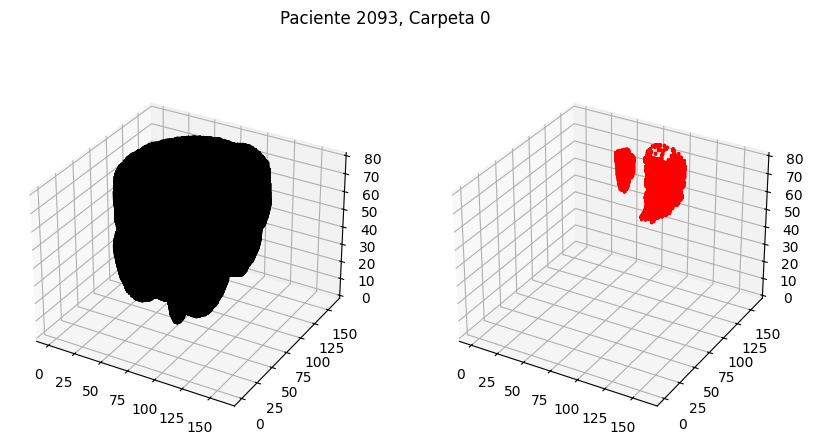

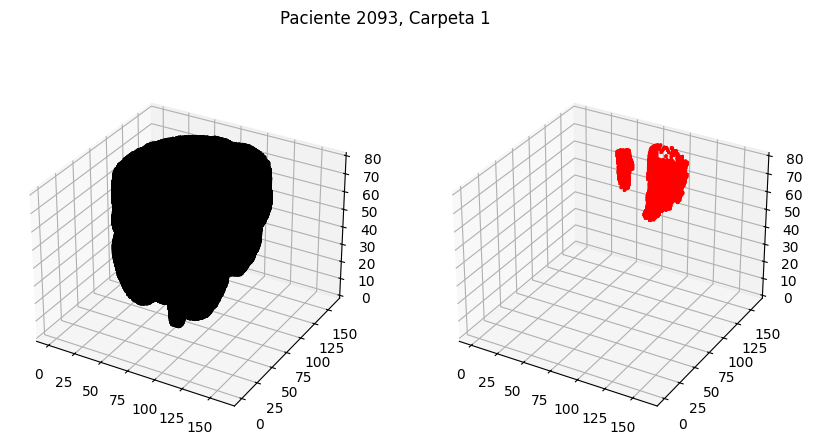

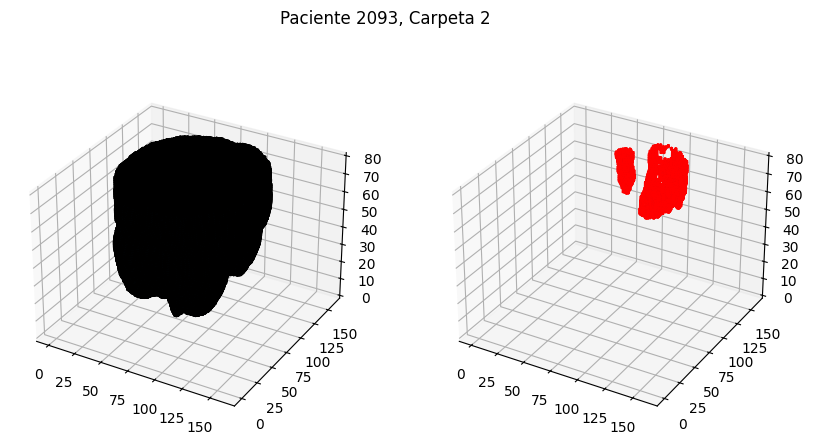

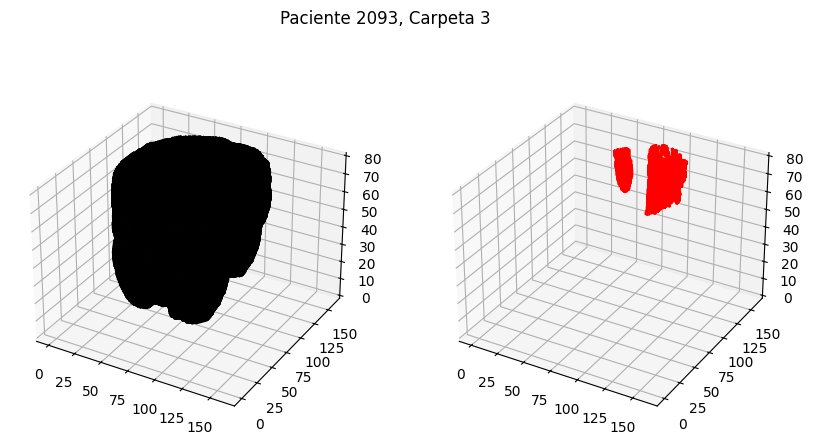

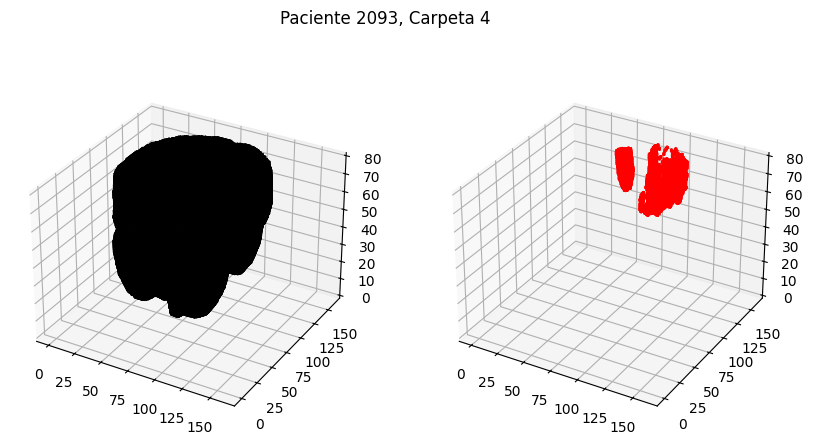

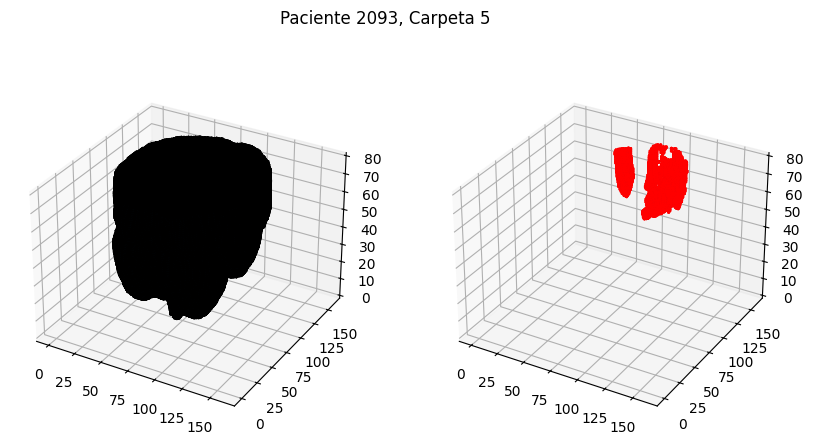

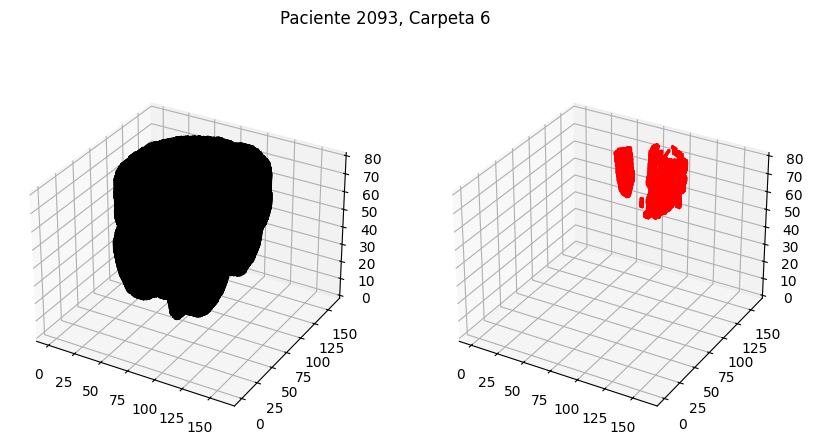

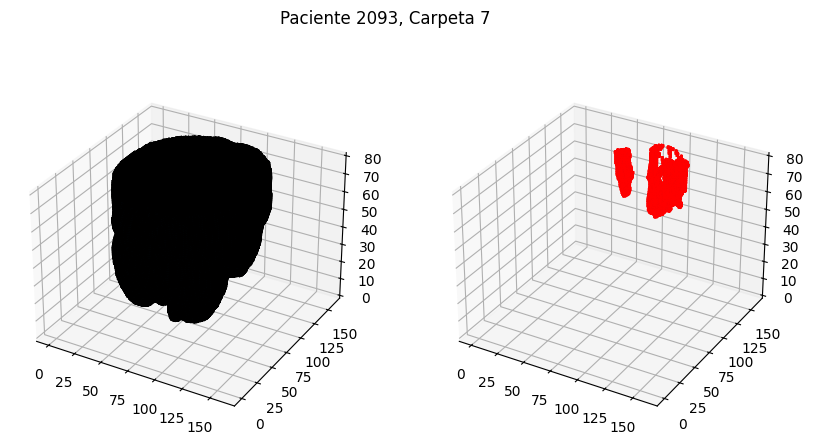

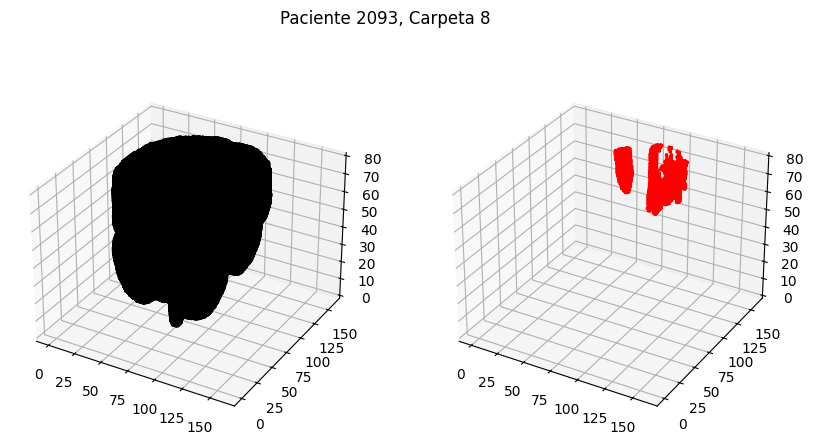

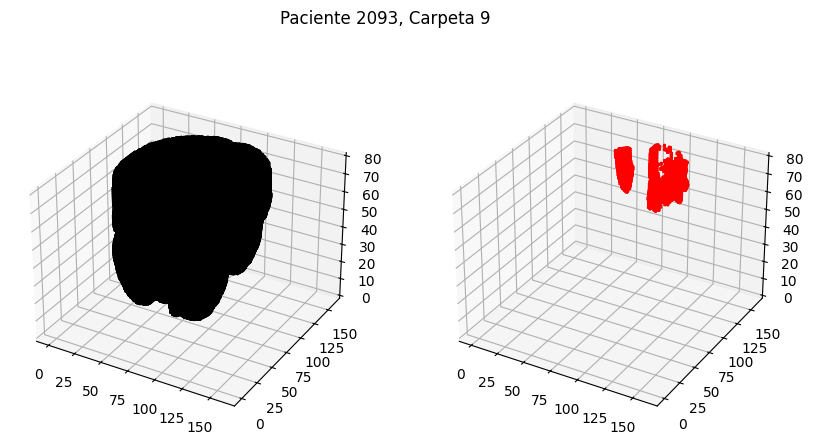

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar los archivos npy correspondientes a un paciente
patient_id = 2093
num_folders = 10  # Suponiendo que el paciente tiene 5 carpetas

# Cargar imágenes y máscaras de cada carpeta
for i in range(num_folders):
    images = np.load(f'C:/Users/lcres/Desktop/modelo/images/patient_{patient_id}_folder_{i}_images.npy')  # Reemplaza con tus nombres de archivos correctos
    masks = np.load(f'C:/Users/lcres/Desktop/modelo/masks/patient_{patient_id}_folder_{i}_masks.npy')    # Reemplaza con tus nombres de archivos correctos

    # Ejemplo de visualización de una imagen y su máscara
    fig = plt.figure(figsize=(10, 5))
    
    # Visualizar una sección de la imagen (por ejemplo, la mitad)
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.voxels(images[:, :, :images.shape[2]//2, 0], edgecolor='k')  # Ajusta según tus datos
    
    # Visualizar la máscara correspondiente
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.voxels(masks[:, :, :masks.shape[2]//2, 1], edgecolor='r')  # Ajusta según tus datos
    
    plt.suptitle(f'Paciente {patient_id}, Carpeta {i}')
    plt.show()


In [18]:
unique_values = np.unique(masks)

# Imprimir en qué rebanadas se encuentran cada clase, excluyendo la clase 0
print("\nRebanadas donde se encuentran cada clase :")
for val in unique_values:
    if val != 0:
        slices = np.unique(np.where(masks == val)[2])
        print(f"Clase {val} se encuentra en las rebanadas:{slices}")


Rebanadas donde se encuentran cada clase :
Clase 1.0 se encuentra en las rebanadas: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]


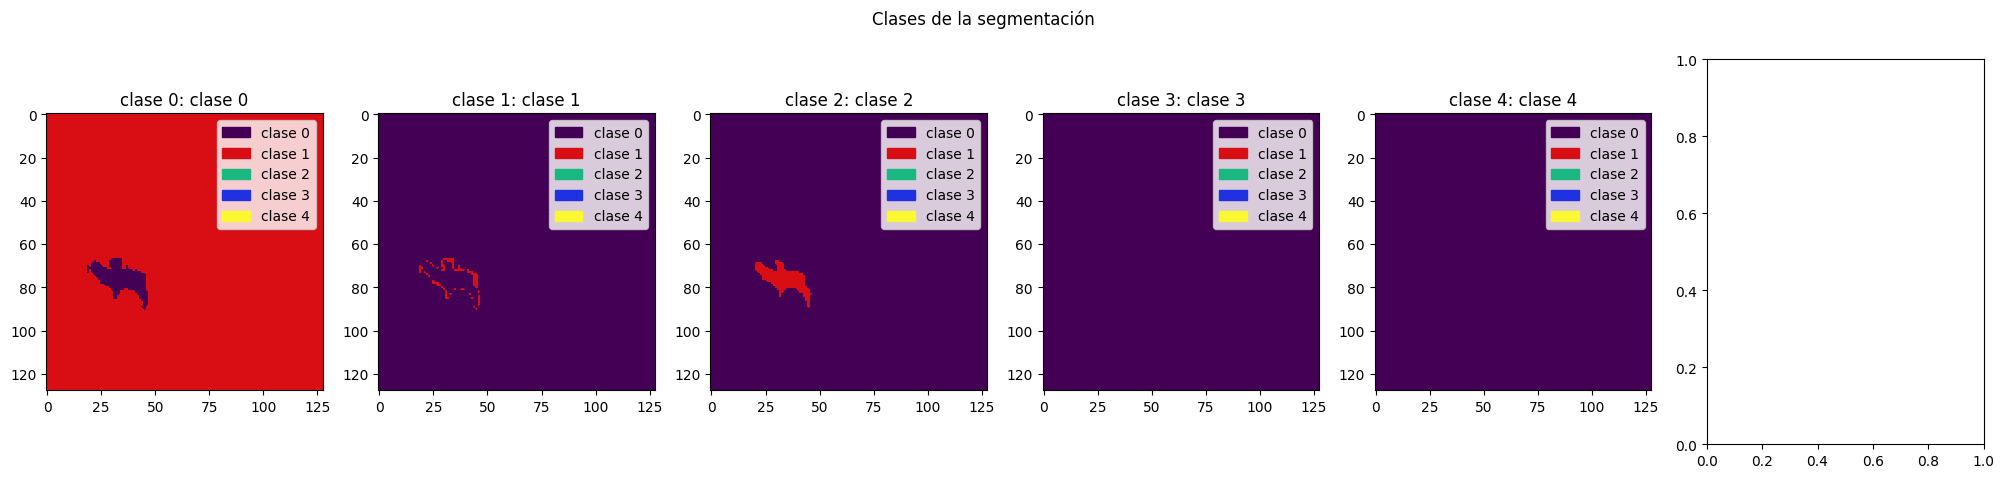

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

masks = np.load(f'C:/Users/lcres/Desktop/split/masks/patient_5_folder_0_masks.npy')    # Reemplaza con tus nombres
# Define colores para cada clase
cmap = mcolors.ListedColormap(['#440054', '#D80E14', '#18b880', '#1F31E0', '#FBF832'])
norm = mcolors.BoundaryNorm([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], cmap.N)

# Define leyenda
class_names = ['clase 0', 'clase 1', 'clase 2', 'clase 3', 'clase 4']
legend = [plt.Rectangle((0, 0), 1, 1, color=cmap(i), label=class_names[i]) for i in range(len(class_names))]

fig, axs = plt.subplots(1, 6, figsize=(25, 5))

for i in range(5):
    axs[i].imshow(masks[:,:,100,i], cmap=cmap, norm=norm)
    axs[i].set_title(f'clase {i}: {class_names[i]}')
    axs[i].legend(handles=legend, loc='upper right')

fig.suptitle('Clases de la segmentación')

plt.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go



# Crear una figura 3D para la imagen
fig_image = go.Figure(data=go.Volume(
    x=np.arange(images.shape[0]),
    y=np.arange(images.shape[1]),
    z=np.arange(images.shape[2]),
    value=images,
    opacity=0.1,  # Ajusta la opacidad según tus preferencias
    isomin=0,  # Ajusta los valores mínimos y máximos según tus datos
    isomax=255
))

# Crear una figura 3D para la máscara
fig_mask = go.Figure(data=go.Volume(
    x=np.arange(masks.shape[0]),
    y=np.arange(masks.shape[1]),
    z=np.arange(masks.shape[2]),
    value=masks,
    opacity=0.5,  # Ajusta la opacidad según tus preferencias
    isomin=0,  # Ajusta los valores mínimos y máximos según tus datos
    isomax=1
))

# Mostrar las figuras
fig_image.show()
fig_mask.show()


In [2]:
import numpy as np
import nibabel as nib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import glob
import os

base_path = r'C:\Users\lcres\PycharmProjects\MPI\BraTS2024-BraTS-GLI-TrainingData\training_data1_v2'
target_shape = (160, 160, 160)  # Dimensiones objetivo
scaler = MinMaxScaler()

# Obtener todas las carpetas en el directorio base
folders = [name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name))]

# Función para obtener el número de paciente de una ruta
def extract_patient_number(folder_name):
    parts = folder_name.split('-')
    if len(parts) >= 2:
        return int(parts[2])
    return None

# Agrupar carpetas por número de paciente
patient_folders = {}
for folder in folders:
    patient_number = extract_patient_number(folder)
    if patient_number is not None:
        if patient_number in patient_folders:
            patient_folders[patient_number].append(folder)
        else:
            patient_folders[patient_number] = [folder]

# Encontrar la longitud máxima de las secuencias
max_timesteps = max(len(folders) for folders in patient_folders.values())
print(max_timesteps)


# Procesar cada carpeta por separado
for patient_number, folders in patient_folders.items():
    # Ordenar las carpetas por el índice temporal si es necesario
    folders.sort()

    # Inicializar listas para almacenar las secuencias temporales
    images_sequence = []
    masks_sequence = []
    
    for folder in folders:
        t1ce_path = glob.glob(os.path.join(base_path, folder, '*t1c.nii.gz'))[0]
        t2f_path = glob.glob(os.path.join(base_path, folder, '*t2f.nii.gz'))[0]
        t2w_path = glob.glob(os.path.join(base_path, folder, '*t2w.nii.gz'))[0]
        t1_path = glob.glob(os.path.join(base_path, folder, '*t1n.nii.gz'))[0]
        seg_path = glob.glob(os.path.join(base_path, folder, '*seg.nii.gz'))[0]

        temp_image_t1 = nib.load(t1_path).get_fdata()
        temp_image_t1 = scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)

        temp_image_t2 = nib.load(t2w_path).get_fdata()
        temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

        temp_image_t1ce = nib.load(t1ce_path).get_fdata()
        temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)

        temp_image_flair = nib.load(t2f_path).get_fdata()
        temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

        temp_mask = nib.load(seg_path).get_fdata().astype(np.uint8)

        temp_combined_images = np.stack([temp_image_t1, temp_image_t1ce, temp_image_t2, temp_image_flair], axis=3)
        
        # Redimensionar a las dimensiones deseadas
        combined_images_resized = resize(temp_combined_images, target_shape, mode='constant', anti_aliasing=True)
        combined_masks_resized = resize(temp_mask, target_shape, mode='constant', anti_aliasing=False, preserve_range=True).astype(np.uint8)

        # Codificar las máscaras
        combined_masks_resized = to_categorical(combined_masks_resized, num_classes=5)

        # Agregar las imágenes y máscaras redimensionadas a la secuencia temporal
        images_sequence.append(combined_images_resized)
        masks_sequence.append(combined_masks_resized)

    # Padding de las secuencias temporales para que todas tengan la misma longitud
    while len(images_sequence) < max_timesteps:
        images_sequence.append(np.zeros_like(images_sequence[0]))
        masks_sequence.append(np.zeros_like(masks_sequence[0]))

    # Convertir las listas de secuencias en arrays numpy
    images_sequence = np.array(images_sequence)
    masks_sequence = np.array(masks_sequence)

    # Guardar las secuencias temporales en archivos npy
    np.save(f'C:/Users/lcres/Desktop/modelo/images/patient_{patient_number}_images.npy', images_sequence)
    np.save(f'C:/Users/lcres/Desktop/modelo/masks/patient_{patient_number}_masks.npy', masks_sequence)
    print(f"Saved patient {patient_number} images and masks with {len(images_sequence)} time steps")


10
Saved patient 5 images and masks with 10 time steps
Saved patient 6 images and masks with 10 time steps
Saved patient 8 images and masks with 10 time steps
Saved patient 9 images and masks with 10 time steps
Saved patient 20 images and masks with 10 time steps
Saved patient 27 images and masks with 10 time steps
Saved patient 33 images and masks with 10 time steps
Saved patient 46 images and masks with 10 time steps
Saved patient 60 images and masks with 10 time steps
Saved patient 63 images and masks with 10 time steps
Saved patient 78 images and masks with 10 time steps
Saved patient 80 images and masks with 10 time steps
Saved patient 85 images and masks with 10 time steps
Saved patient 96 images and masks with 10 time steps
Saved patient 463 images and masks with 10 time steps
Saved patient 469 images and masks with 10 time steps
Saved patient 472 images and masks with 10 time steps
Saved patient 483 images and masks with 10 time steps
Saved patient 485 images and masks with 10 

KeyboardInterrupt: 

In [1]:
import numpy as np

# Cargar el archivo .npy
images_sequence = np.load(f"patient_8_images.npy")
masks_sequence = np.load(f"patient_8_masks.npy")


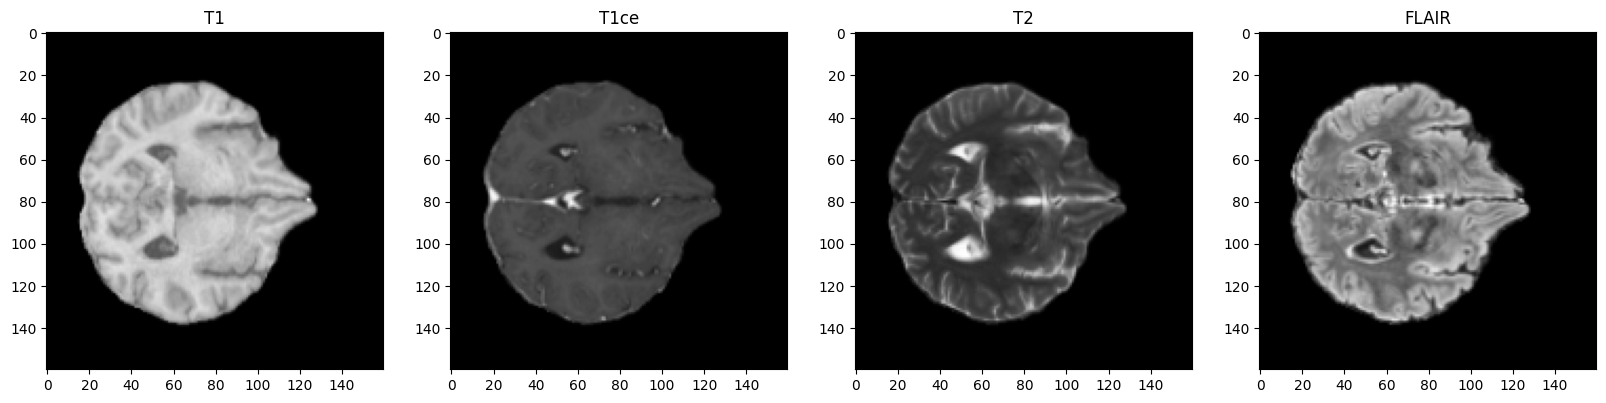

In [6]:
import matplotlib.pyplot as plt

# Seleccionar un paso temporal (por ejemplo, el primer paso temporal)
time_step = 0

# Seleccionar una rebanada del eje z (por ejemplo, la rebanada en el medio)
z_slice = images_sequence.shape[2] // 2

# Visualizar las 4 modalidades de imagen en el mismo paso temporal y rebanada
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
modalities = ['T1', 'T1ce', 'T2', 'FLAIR']

for i in range(4):
    axes[i].imshow(images_sequence[time_step, :, :, z_slice, i], cmap='gray')
    axes[i].set_title(modalities[i])

plt.show()


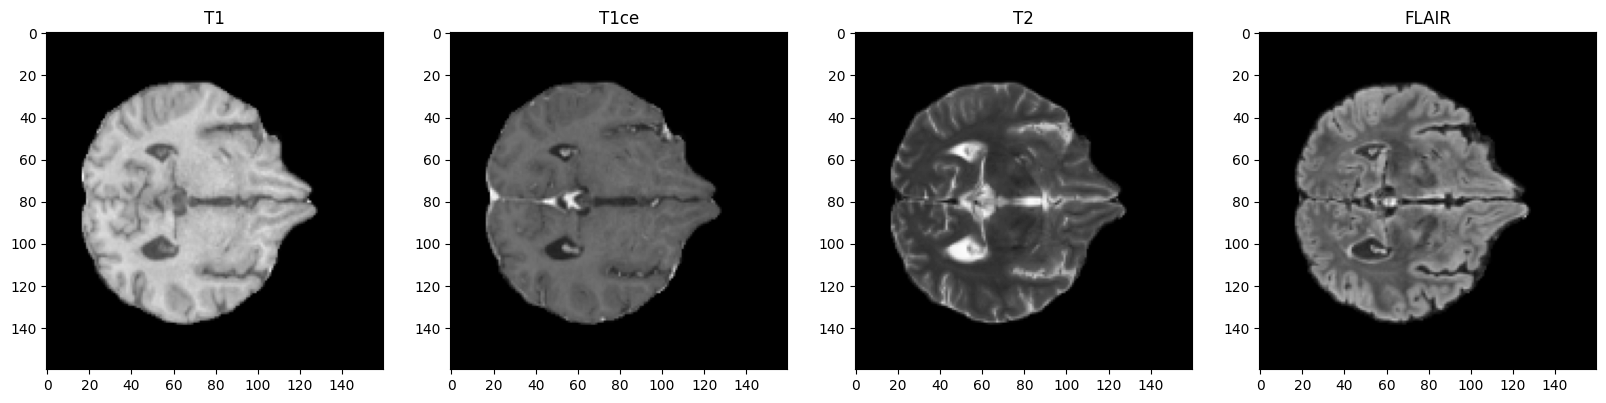

In [9]:
import matplotlib.pyplot as plt

# Seleccionar un paso temporal (por ejemplo, el primer paso temporal)
time_step = 1

# Seleccionar una rebanada del eje z (por ejemplo, la rebanada en el medio)
z_slice = images_sequence.shape[2] // 2

# Visualizar las 4 modalidades de imagen en el mismo paso temporal y rebanada
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
modalities = ['T1', 'T1ce', 'T2', 'FLAIR']

for i in range(4):
    axes[i].imshow(images_sequence[time_step, :, :, z_slice, i], cmap='gray')
    axes[i].set_title(modalities[i])

plt.show()


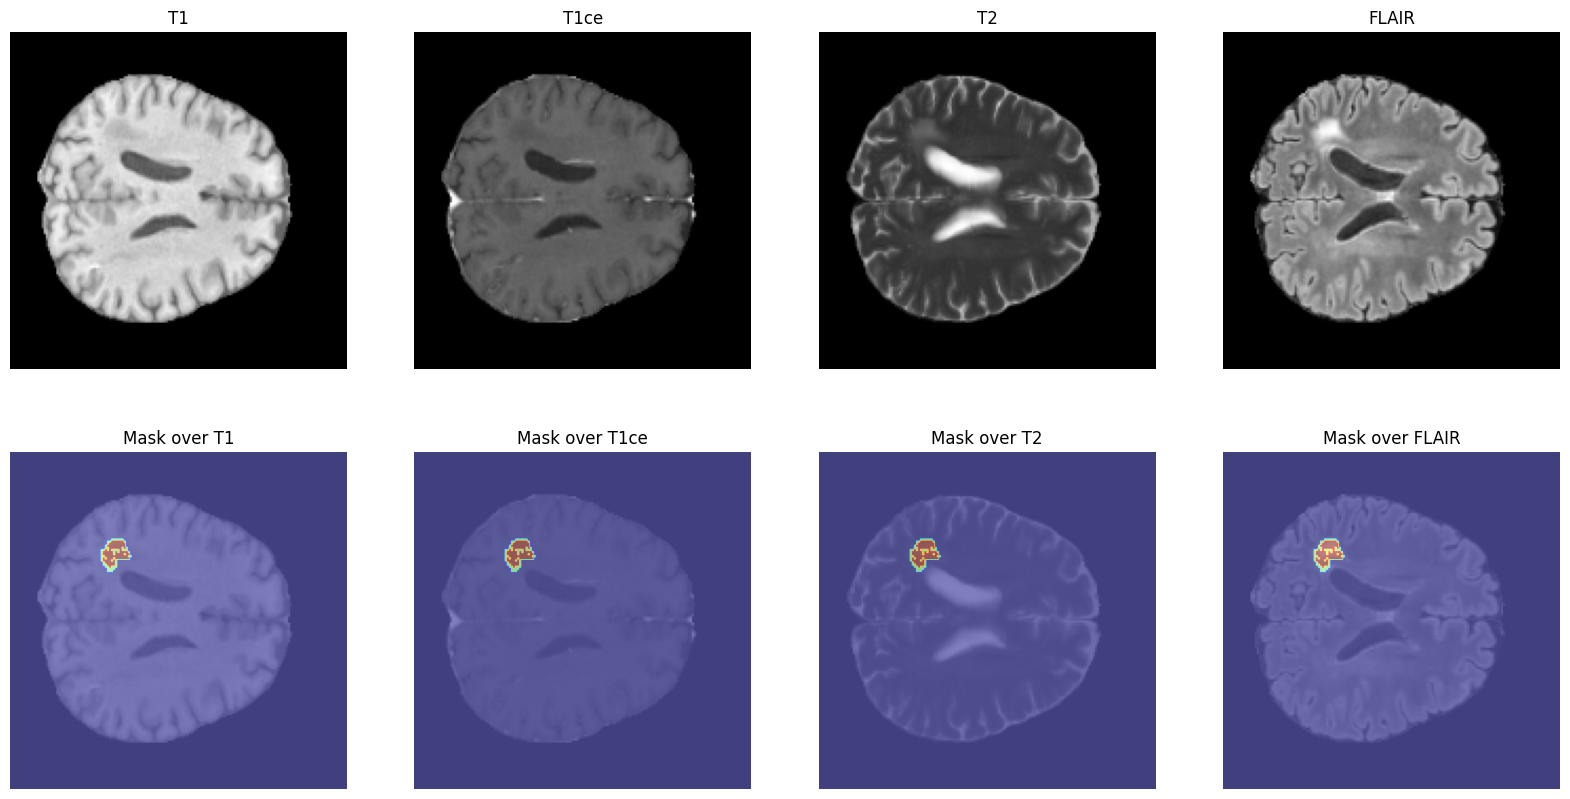

In [2]:
import matplotlib.pyplot as plt

# Seleccionar un paso temporal (por ejemplo, el primer paso temporal)
time_step = 1

# Seleccionar una rebanada del eje z (por ejemplo, la rebanada en el medio)
z_slice = images_sequence.shape[2] // 2

# Crear un subplot de 2 filas y 4 columnas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
modalities = ['T1', 'T1ce', 'T2', 'FLAIR']

# Visualizar las 4 modalidades de imagen en la primera fila
for i in range(4):
    axes[0, i].imshow(images_sequence[time_step, :, :, z_slice, i], cmap='gray')
    axes[0, i].set_title(modalities[i])
    axes[0, i].axis('off')

# Visualizar las máscaras correspondientes en la segunda fila
# Aquí visualizamos todas las clases de la máscara superpuestas
for i in range(4):
    combined_mask = np.argmax(masks_sequence[time_step, :, :, z_slice], axis=-1)
    axes[1, i].imshow(images_sequence[time_step, :, :, z_slice, i], cmap='gray', alpha=0.5)
    axes[1, i].imshow(combined_mask, cmap='jet', alpha=0.5)
    axes[1, i].set_title(f'Mask over {modalities[i]}')
    axes[1, i].axis('off')

plt.show()


In [1]:
import numpy as np
import nibabel as nib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import glob
import os
import h5py
base_path = r'C:\Users\lcres\PycharmProjects\MPI\BraTS2024-BraTS-GLI-TrainingData\training_data1_v2'
target_shape = (128, 128, 128)  # Dimensiones objetivo
scaler = MinMaxScaler()

# Obtener todas las carpetas en el directorio base
folders = [name for name in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, name))]

# Función para obtener el número de paciente de una ruta
def extract_patient_number(folder_name):
    parts = folder_name.split('-')
    if len(parts) >= 2:
        return int(parts[2])
    return None

# Agrupar carpetas por número de paciente
patient_folders = {}
for folder in folders:
    patient_number = extract_patient_number(folder)
    if patient_number is not None:
        if patient_number in patient_folders:
            patient_folders[patient_number].append(folder)
        else:
            patient_folders[patient_number] = [folder]

# Encontrar la longitud máxima de las secuencias
max_timesteps = max(len(folders) for folders in patient_folders.values())
print(max_timesteps)


# Procesar cada carpeta por separado
for patient_number, folders in patient_folders.items():
    # Ordenar las carpetas por el índice temporal si es necesario
    folders.sort()

    # Inicializar listas para almacenar las secuencias temporales
    images_sequence = []
    masks_sequence = []
    
    for folder in folders:
        t1ce_path = glob.glob(os.path.join(base_path, folder, '*t1c.nii.gz'))[0]
        t2f_path = glob.glob(os.path.join(base_path, folder, '*t2f.nii.gz'))[0]
        t2w_path = glob.glob(os.path.join(base_path, folder, '*t2w.nii.gz'))[0]
        t1_path = glob.glob(os.path.join(base_path, folder, '*t1n.nii.gz'))[0]
        seg_path = glob.glob(os.path.join(base_path, folder, '*seg.nii.gz'))[0]

        temp_image_t1 = nib.load(t1_path).get_fdata()
        temp_image_t1 = scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)

        temp_image_t2 = nib.load(t2w_path).get_fdata()
        temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

        temp_image_t1ce = nib.load(t1ce_path).get_fdata()
        temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)

        temp_image_flair = nib.load(t2f_path).get_fdata()
        temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

        temp_mask = nib.load(seg_path).get_fdata().astype(np.uint8)

        temp_combined_images = np.stack([temp_image_t1, temp_image_t1ce, temp_image_t2, temp_image_flair], axis=3)
        
        # Redimensionar a las dimensiones deseadas
        combined_images_resized = resize(temp_combined_images, target_shape, mode='constant', anti_aliasing=True)
        combined_masks_resized = resize(temp_mask, target_shape, mode='constant', anti_aliasing=False, preserve_range=True).astype(np.uint8)

        # Codificar las máscaras
        combined_masks_resized = to_categorical(combined_masks_resized, num_classes=5)

        # Agregar las imágenes y máscaras redimensionadas a la secuencia temporal
        images_sequence.append(combined_images_resized)
        masks_sequence.append(combined_masks_resized)

    # Padding de las secuencias temporales para que todas tengan la misma longitud
    while len(images_sequence) < max_timesteps:
        images_sequence.append(np.zeros_like(images_sequence[0]))
        masks_sequence.append(np.zeros_like(masks_sequence[0]))

    # Convertir las listas de secuencias en arrays numpy
    images_sequence = np.array(images_sequence)
    masks_sequence = np.array(masks_sequence)

    # Guardar las secuencias temporales en archivos npy
    # Guardar las secuencias temporales en archivos HDF5
    with h5py.File(f'C:/Users/lcres/Desktop/modelo/patient_{patient_number}_data.h5', 'w') as hf:
        hf.create_dataset('images', data=images_sequence, compression='gzip')
        hf.create_dataset('masks', data=masks_sequence, compression='gzip')
    
    print(f"Saved patient {patient_number} images and masks with {len(images_sequence)} time steps")


10
Saved patient 5 images and masks with 10 time steps
Saved patient 6 images and masks with 10 time steps
Saved patient 8 images and masks with 10 time steps
Saved patient 9 images and masks with 10 time steps
Saved patient 20 images and masks with 10 time steps
Saved patient 27 images and masks with 10 time steps
Saved patient 33 images and masks with 10 time steps
Saved patient 46 images and masks with 10 time steps
Saved patient 60 images and masks with 10 time steps
Saved patient 63 images and masks with 10 time steps
Saved patient 78 images and masks with 10 time steps
Saved patient 80 images and masks with 10 time steps
Saved patient 85 images and masks with 10 time steps
Saved patient 96 images and masks with 10 time steps
Saved patient 463 images and masks with 10 time steps
Saved patient 469 images and masks with 10 time steps
Saved patient 472 images and masks with 10 time steps
Saved patient 483 images and masks with 10 time steps
Saved patient 485 images and masks with 10 

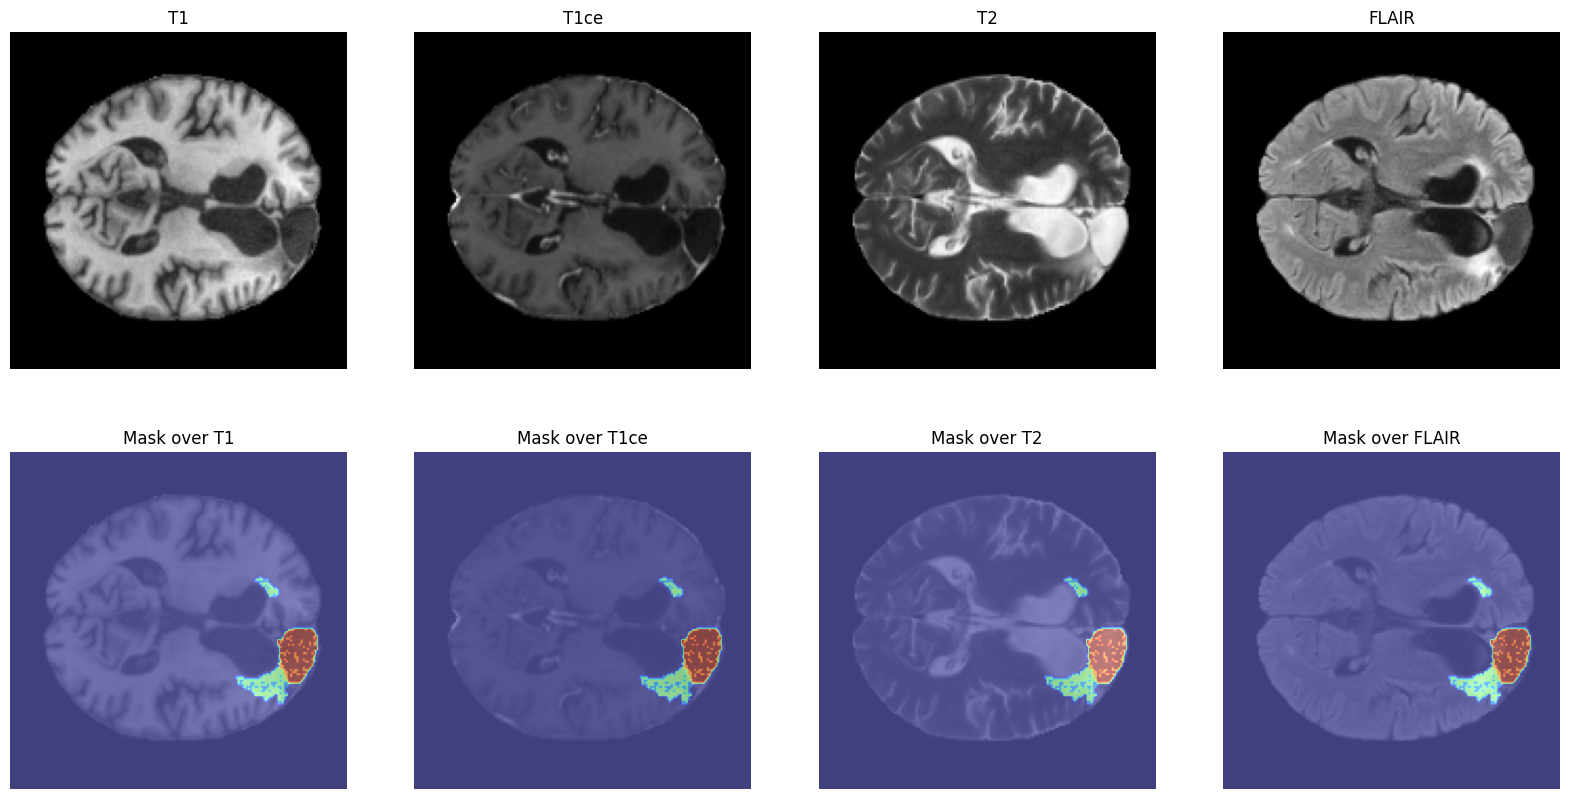

In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Función para cargar datos de un archivo HDF5
def load_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as hf:
        images_sequence = hf['images'][:]
        masks_sequence = hf['masks'][:]
    return images_sequence, masks_sequence

# Cargar el archivo HDF5
file_path = 'C:/Users/lcres/Desktop/modelo/patient_2093_data.h5'
images_sequence, masks_sequence = load_hdf5_file(file_path)

# Seleccionar un paso temporal (por ejemplo, el primer paso temporal)
time_step = 9

# Seleccionar una rebanada del eje z (por ejemplo, la rebanada en el medio)
z_slice = images_sequence.shape[2] // 2

# Crear un subplot de 2 filas y 4 columnas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
modalities = ['T1', 'T1ce', 'T2', 'FLAIR']

# Visualizar las 4 modalidades de imagen en la primera fila
for i in range(4):
    axes[0, i].imshow(images_sequence[time_step, :, :, z_slice, i], cmap='gray')
    axes[0, i].set_title(modalities[i])
    axes[0, i].axis('off')

# Visualizar las máscaras correspondientes en la segunda fila
# Aquí visualizamos todas las clases de la máscara superpuestas
for i in range(4):
    combined_mask = np.argmax(masks_sequence[time_step, :, :, z_slice], axis=-1)
    axes[1, i].imshow(images_sequence[time_step, :, :, z_slice, i], cmap='gray', alpha=0.5)
    axes[1, i].imshow(combined_mask, cmap='jet', alpha=0.5)
    axes[1, i].set_title(f'Mask over {modalities[i]}')
    axes[1, i].axis('off')

plt.show()


In [3]:
TRAIN_DATASET_PATH = 'GLIOMA/'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-00017-000/BraTS-GLI-00017-000-t2f.nii.gz').get_fdata()
print(test_image_flair.max())
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)


test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-00017-000/BraTS-GLI-00017-000-t1n.nii.gz').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-00017-000/BraTS-GLI-00017-000-t1c.nii.gz').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-00017-000/BraTS-GLI-00017-000-t2w.nii.gz').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS-GLI-00017-000/BraTS-GLI-00017-000-seg.nii.gz').get_fdata()
test_mask=test_mask.astype(np.uint8)

print(np.unique(test_mask))


3162.0
[0 1 2 3]


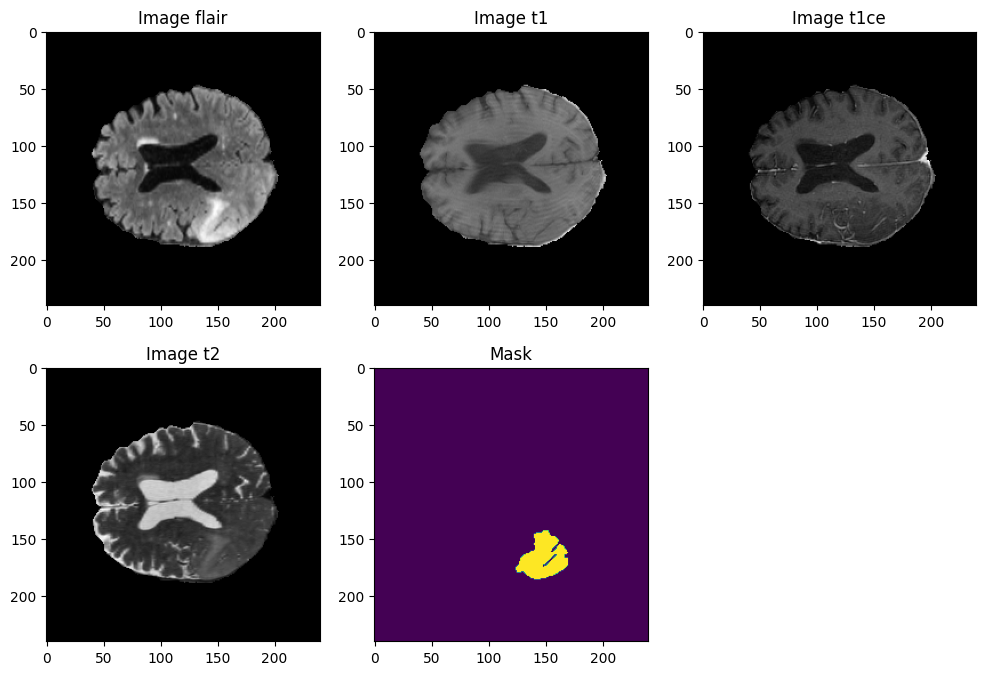

In [13]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

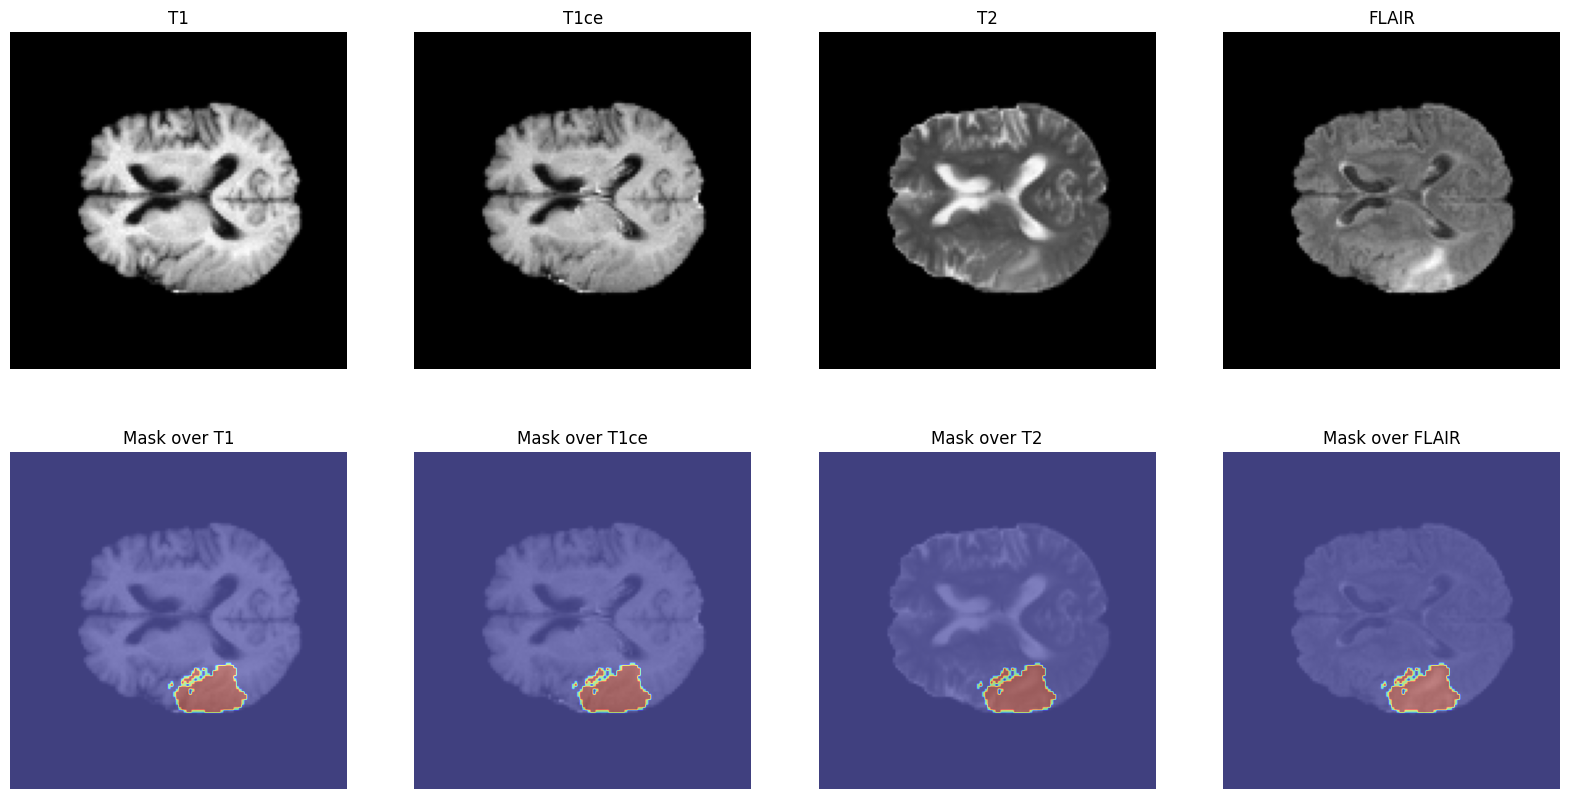

In [15]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Función para cargar datos de un archivo HDF5
def load_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as hf:
        images_sequence = hf['images'][:]
        masks_sequence = hf['masks'][:]
    return images_sequence, masks_sequence

# Cargar el archivo HDF5
file_path = 'C:/Users/lcres/Desktop/modelo/patient_16.h5'
images_sequence, masks_sequence = load_hdf5_file(file_path)

# Seleccionar una rebanada del eje z (por ejemplo, la rebanada en el medio)
z_slice = images_sequence.shape[2] // 2

# Crear un subplot de 2 filas y 4 columnas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
modalities = ['T1', 'T1ce', 'T2', 'FLAIR']

# Visualizar las 4 modalidades de imagen en la primera fila
for i in range(4):
    axes[0, i].imshow(images_sequence[:, :, z_slice, i], cmap='gray')
    axes[0, i].set_title(modalities[i])
    axes[0, i].axis('off')

# Visualizar las máscaras correspondientes en la segunda fila
# Aquí visualizamos todas las clases de la máscara superpuestas
combined_mask = np.argmax(masks_sequence[:, :, z_slice], axis=-1)
for i in range(4):
    axes[1, i].imshow(images_sequence[:, :, z_slice, i], cmap='gray', alpha=0.5)
    axes[1, i].imshow(combined_mask, cmap='jet', alpha=0.5)
    axes[1, i].set_title(f'Mask over {modalities[i]}')
    axes[1, i].axis('off')

plt.show()


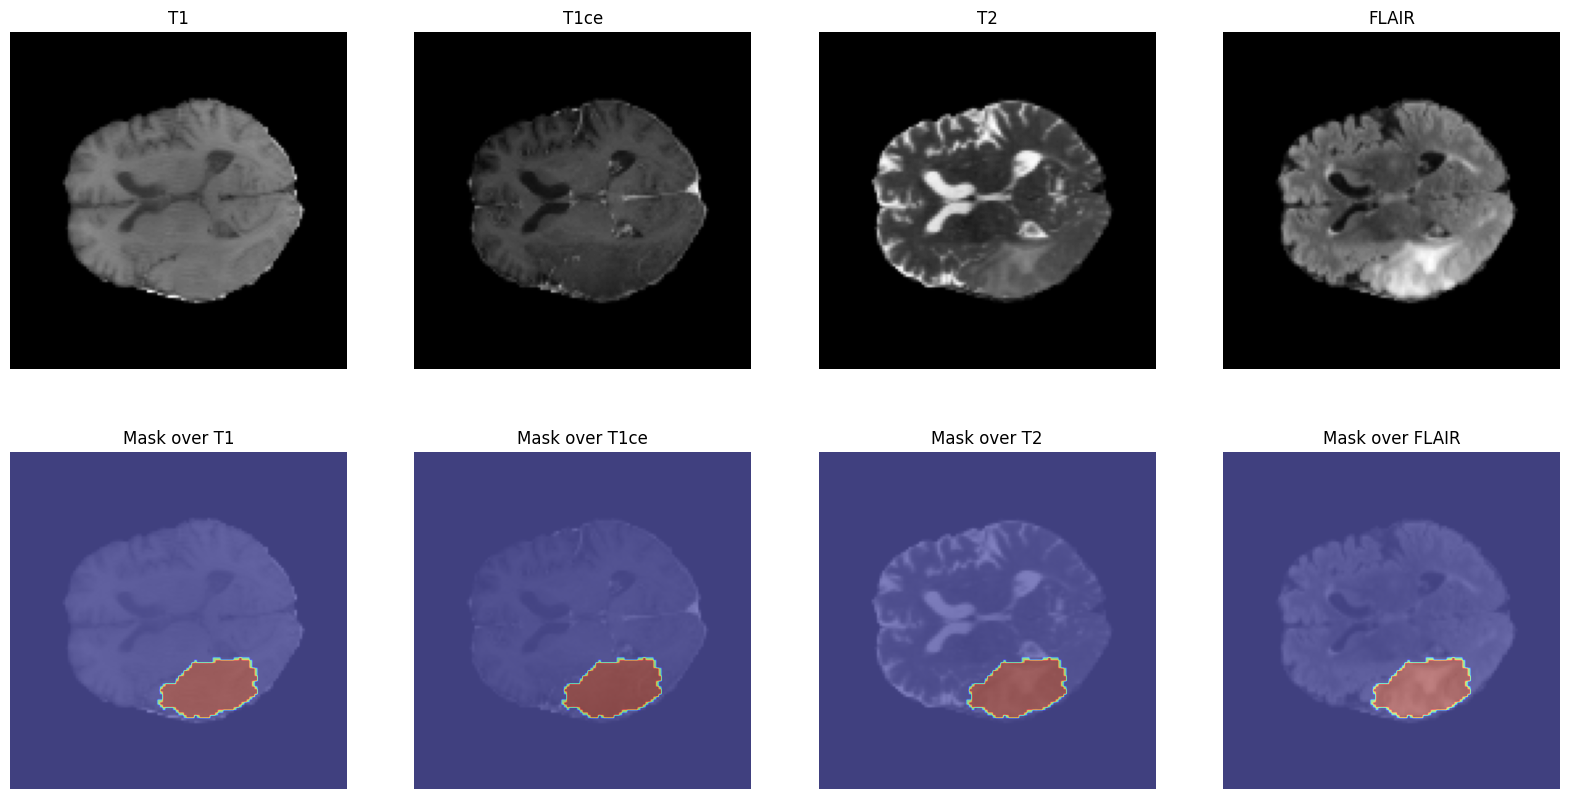

In [16]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Función para cargar datos de un archivo HDF5
def load_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as hf:
        images_sequence = hf['images'][:]
        masks_sequence = hf['masks'][:]
    return images_sequence, masks_sequence

# Cargar el archivo HDF5
file_path = 'C:/Users/lcres/Desktop/modelo/patient_15.h5'
images_sequence, masks_sequence = load_hdf5_file(file_path)

# Seleccionar una rebanada del eje z (por ejemplo, la rebanada en el medio)
z_slice = images_sequence.shape[2] // 2

# Crear un subplot de 2 filas y 4 columnas
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
modalities = ['T1', 'T1ce', 'T2', 'FLAIR']

# Visualizar las 4 modalidades de imagen en la primera fila
for i in range(4):
    axes[0, i].imshow(images_sequence[:, :, z_slice, i], cmap='gray')
    axes[0, i].set_title(modalities[i])
    axes[0, i].axis('off')

# Visualizar las máscaras correspondientes en la segunda fila
# Aquí visualizamos todas las clases de la máscara superpuestas
combined_mask = np.argmax(masks_sequence[:, :, z_slice], axis=-1)
for i in range(4):
    axes[1, i].imshow(images_sequence[:, :, z_slice, i], cmap='gray', alpha=0.5)
    axes[1, i].imshow(combined_mask, cmap='jet', alpha=0.5)
    axes[1, i].set_title(f'Mask over {modalities[i]}')
    axes[1, i].axis('off')

plt.show()
